This is a script for comparing post-processing performance (test RMSE) of random forest regression models modelling raw and log-transformed visibility observations. Figure 4.7 and 4.8 in the report are produced using this script.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
# Change paths for own use
ROOT = "ROOT/"
data_path = ROOT+"raw_data_EUPPBench/"
result_path = ROOT+"trained_models/lead_time_continuous/"

In [3]:
# Results df for random forest regression (modelling raw vis obs)
df_test_result = pd.read_csv(result_path + "results_giant_20_300.csv")
test_error_rf = df_test_result['error_rf']

# Results df for random forest regression (modelling log-transformed vis obs)
df_test_result_transformed = pd.read_csv(result_path + "results_giant_log_20_300.csv")
test_error_rf_transformed = df_test_result_transformed['error_rf']

/Users/clifflau/opt/anaconda3/lib/python3.8/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.30.0
  warnings.warn(


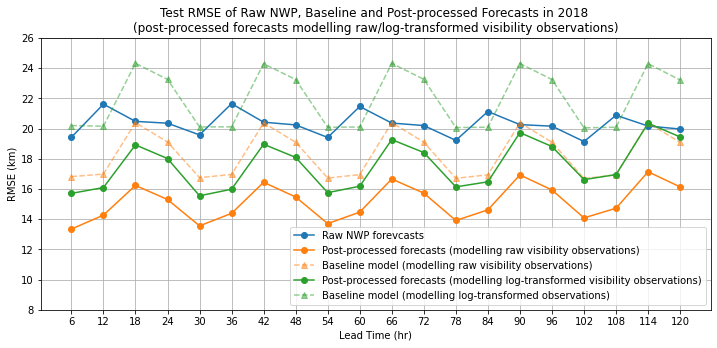

In [4]:
# Plot test RMSE by lead time
import xarray as xr
vis_forecast_obs = xr.open_dataarray(data_path + "vis_forecast_observations.nc")
lead = np.array(vis_forecast_obs['forecast_period'][1:])
lead_hr = np.array(lead*10**-9/3600, dtype='int')

rmse_rf = []
rmse_rf_transformed = []
rmse_forecast = []
rmse_baseline = []
rmse_baseline_transformed = []

for l in lead_hr:
    df_result_lead = df_test_result[df_test_result['lead_hr']==l]
    df_result_lead_transformed = df_test_result_transformed[df_test_result_transformed['lead_hr']==l]
    rmse_rf.append(np.sqrt(np.mean(df_result_lead['error_rf']**2)))
    rmse_rf_transformed.append(np.sqrt(np.mean(df_result_lead_transformed['error_rf']**2)))
    rmse_forecast.append(np.sqrt(np.mean(df_result_lead['error_nwp']**2)))
    rmse_baseline.append(np.sqrt(np.mean(df_result_lead['error_baseline']**2)))
    rmse_baseline_transformed.append(np.sqrt(np.mean(df_result_lead_transformed['error_baseline']**2)))

rmse_rf = np.array(rmse_rf)/1000
rmse_rf_transformed = np.array(rmse_rf_transformed)/1000
rmse_forecast = np.array(rmse_forecast)/1000
rmse_baseline = np.array(rmse_baseline)/1000
rmse_baseline_transformed = np.array(rmse_baseline_transformed)/1000

fig, ax1 = plt.subplots(figsize=(12,5))
ax1.plot(lead_hr, rmse_forecast, 'o-', label='Raw NWP forevcasts')
ax1.plot(lead_hr, rmse_rf, 'o-', label='Post-processed forecasts (modelling raw visibility observations)', c='tab:orange')
ax1.plot(lead_hr, rmse_baseline, '^--', label='Baseline model (modelling raw visibility observations)', c='tab:orange', alpha=0.5)
ax1.plot(lead_hr, rmse_rf_transformed, 'o-', label='Post-processed forecasts (modelling log-transformed visibility observations)', c='tab:green')
ax1.plot(lead_hr, rmse_baseline_transformed, '^--', label='Baseline model (modelling log-transformed observations)', c='tab:green', alpha=0.5)
ax1.set_ylim(8,26)
plt.grid()
ax1.set_xticks(lead_hr)
ax1.set_xlabel("Lead Time (hr)")
ax1.set_ylabel("RMSE (km)")
ax1.set_title("Test RMSE of Raw NWP, Baseline and Post-processed Forecasts in 2018 \n(post-processed forecasts modelling raw/log-transformed visibility observations)")
ax1.legend(loc='lower right')

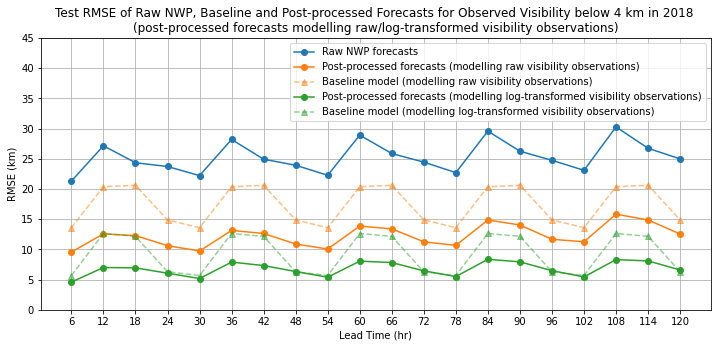

In [5]:
# Focus on obs below 4km
rmse_rf = []
rmse_rf_transformed = []
rmse_forecast = []
rmse_baseline = []
rmse_baseline_transformed = []

for l in lead_hr:
    df_result_lead = df_test_result[(df_test_result['lead_hr']==l) & (df_test_result['vis_obs']<=4000)]
    df_result_lead_transformed = df_test_result_transformed[(df_test_result_transformed['lead_hr']==l) & (df_test_result_transformed['vis_obs']<=4000)]
    rmse_rf.append(np.sqrt(np.mean(df_result_lead['error_rf']**2)))
    rmse_rf_transformed.append(np.sqrt(np.mean(df_result_lead_transformed['error_rf']**2)))
    rmse_forecast.append(np.sqrt(np.mean(df_result_lead['error_nwp']**2)))
    rmse_baseline.append(np.sqrt(np.mean(df_result_lead['error_baseline']**2)))
    rmse_baseline_transformed.append(np.sqrt(np.mean(df_result_lead_transformed['error_baseline']**2)))

rmse_rf = np.array(rmse_rf)/1000
rmse_rf_transformed = np.array(rmse_rf_transformed)/1000
rmse_forecast = np.array(rmse_forecast)/1000
rmse_baseline = np.array(rmse_baseline)/1000
rmse_baseline_transformed = np.array(rmse_baseline_transformed)/1000

fig, ax1 = plt.subplots(figsize=(12,5))
ax1.plot(lead_hr, rmse_forecast, 'o-', label='Raw NWP forecasts')
ax1.plot(lead_hr, rmse_rf, 'o-', label='Post-processed forecasts (modelling raw visibility observations)', c='tab:orange')
ax1.plot(lead_hr, rmse_baseline, '^--', label='Baseline model (modelling raw visibility observations)', c='tab:orange', alpha=0.5)
ax1.plot(lead_hr, rmse_rf_transformed, 'o-', label='Post-processed forecasts (modelling log-transformed visibility observations)', c='tab:green')
ax1.plot(lead_hr, rmse_baseline_transformed, '^--', label='Baseline model (modelling log-transformed visibility observations)', c='tab:green', alpha=0.5)
ax1.set_ylim(0,45)
plt.grid()
ax1.set_xticks(lead_hr)
ax1.set_xlabel("Lead Time (hr)")
ax1.set_ylabel("RMSE (km)")
ax1.set_title("Test RMSE of Raw NWP, Baseline and Post-processed Forecasts for Observed Visibility below 4 km in 2018 \n(post-processed forecasts modelling raw/log-transformed visibility observations)")
ax1.legend(loc='upper right')

In [6]:
# Create arrays for visibility observations, visibility forecasts (before and after post-processing) for test period (2018)
vis_obs = np.array(df_test_result['vis_obs'])
vis_nwp = np.array(df_test_result['vis_ensemble_mean'])
vis_post_processed = np.array(df_test_result['vis_rf'])
vis_post_processed_transformed = np.array(df_test_result_transformed['vis_rf'])

Text(0.5, 1.0, 'Distribution Post-processed Visibility in 2018 \n(modelling raw visibility observations by random forest regression)')

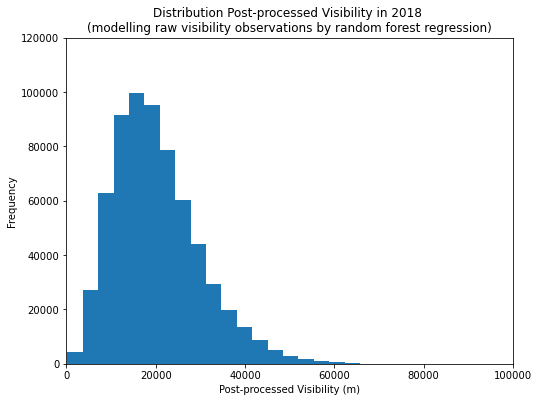

In [7]:
# Distribution of post-processed visibility forecasts (rf modelling raw vis obs)
plt.figure(figsize=(8,6))
plt.hist(vis_post_processed, bins=20)
plt.xlim(0,100000)
plt.ylim(0,120000)
plt.xlabel("Post-processed Visibility (m)")
plt.ylabel("Frequency")
plt.title("Distribution Post-processed Visibility in 2018 \n(modelling raw visibility observations by random forest regression)")

Text(0.5, 1.0, 'Distribution Post-processed Visibility  in 2018 \n(modelling transformed visibility observations by random forest regression)')

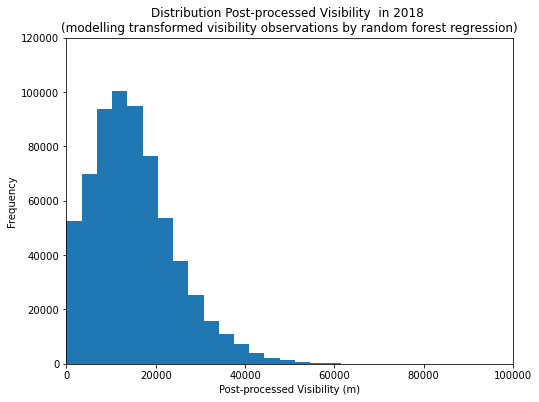

In [8]:
# Distribution of post-processed visibility forecasts (rf modelling log-transformed vis obs)
plt.figure(figsize=(8,6))
plt.hist(vis_post_processed_transformed, bins=20)
plt.xlim(0,100000)
plt.ylim(0,120000)
plt.xlabel("Post-processed Visibility (m)")
plt.ylabel("Frequency")
plt.title("Distribution Post-processed Visibility  in 2018 \n(modelling transformed visibility observations by random forest regression)")

Text(0.5, 1.0, 'Distribution of Forecasted Visibility in 2018 \n(post-processed with log-transformed outputs)')

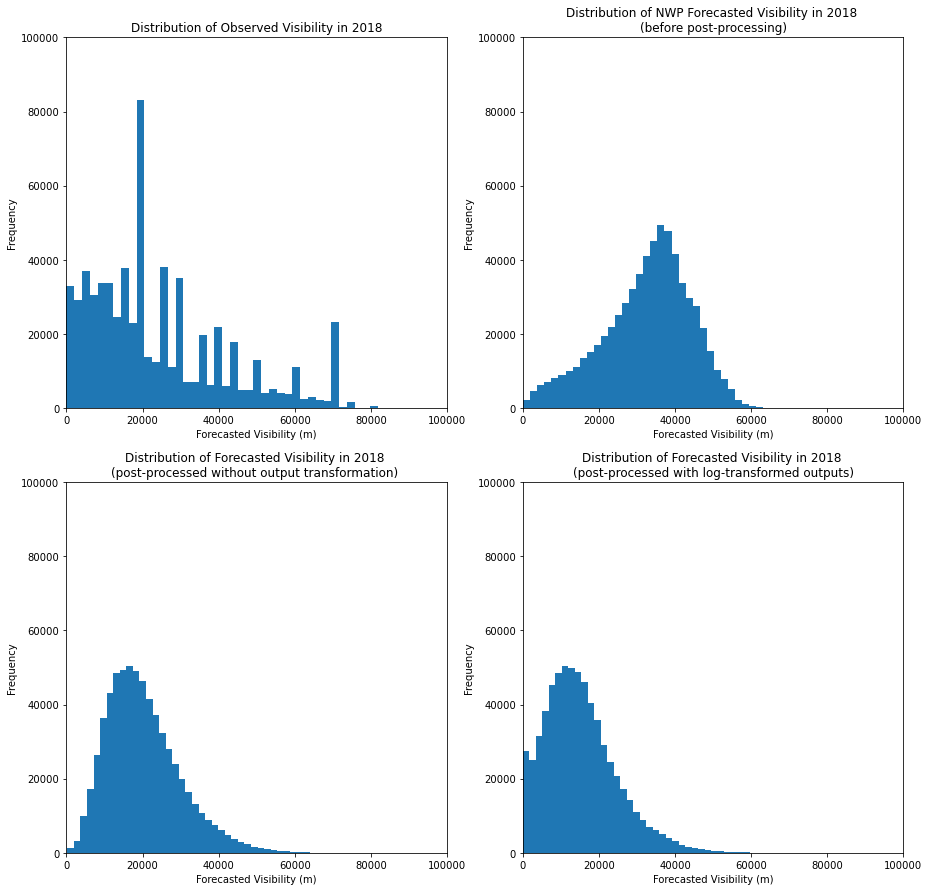

In [11]:
fig, axs = plt.subplots(2,2, figsize=(15,15))
axs[0,0].hist(vis_obs, bins=40)
axs[0,0].set_xlim(0,100000)
axs[0,0].set_ylim(0,100000)
axs[0,0].set_xlabel("Forecasted Visibility (m)")
axs[0,0].set_ylabel("Frequency")
axs[0,0].set_title("Distribution of Observed Visibility in 2018")
axs[0,1].hist(vis_nwp, bins=40)
axs[0,1].set_xlim(0,100000)
axs[0,1].set_ylim(0,100000)
axs[0,1].set_xlabel("Forecasted Visibility (m)")
axs[0,1].set_ylabel("Frequency")
axs[0,1].set_title("Distribution of NWP Forecasted Visibility in 2018 \n(before post-processing)")
axs[1,0].hist(vis_post_processed, bins=40)
axs[1,0].set_xlim(0,100000)
axs[1,0].set_ylim(0,100000)
axs[1,0].set_xlabel("Forecasted Visibility (m)")
axs[1,0].set_ylabel("Frequency")
axs[1,0].set_title("Distribution of Forecasted Visibility in 2018 \n(post-processed without output transformation) ")
axs[1,1].hist(vis_post_processed_transformed, bins=40)
axs[1,1].set_xlim(0,100000)
axs[1,1].set_ylim(0,100000)
axs[1,1].set_xlabel("Forecasted Visibility (m)")
axs[1,1].set_ylabel("Frequency")
axs[1,1].set_title("Distribution of Forecasted Visibility in 2018 \n(post-processed with log-transformed outputs)")

In [12]:
# Creats a sample containing 10% of the test records
df_sample = df_test_result.sample(frac=0.1, random_state=1)
df_sample_transformed = df_test_result_transformed.sample(frac=0.1, random_state=1)
vis_obs_sample = np.array(df_sample['vis_obs'])
vis_obs_sample_transformed = np.array(df_sample_transformed['vis_obs'])
vis_nwp_sample = np.array(df_sample['vis_ensemble_mean'])
vis_post_processed_sample = np.array(df_sample['vis_rf'])
vis_post_processed_sample_transformed = np.array(df_sample_transformed['vis_rf'])

Text(0.5, 1.0, 'Post-processed Forecast (modelling transformed vis obs) against \nObserved Visibility in 2018 (showing only 10% records)')

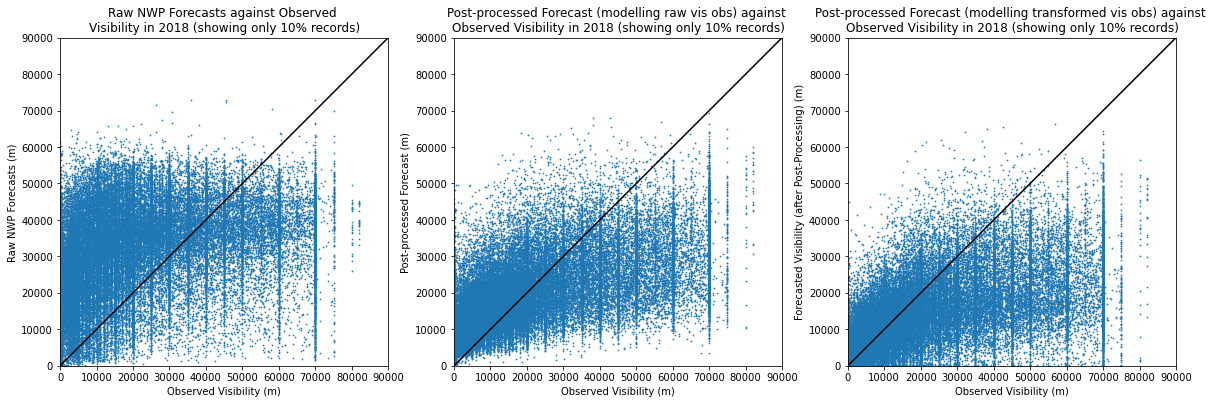

In [17]:
# Forecasts-against-observations plot
fig, axs = plt.subplots(1, 3, figsize=(20,13))
axs[0].scatter(vis_obs_sample, vis_nwp_sample, s=0.5)
axs[0].plot(np.arange(0,90000),np.arange(0,90000), '-', c='black')
axs[0].set_xlim(0,90000)
axs[0].set_ylim(0,90000)
axs[0].set(aspect='equal')
axs[0].set_xlabel("Observed Visibility (m)")
axs[0].set_ylabel("Raw NWP Forecasts (m)")
axs[0].set_title("Raw NWP Forecasts against Observed \nVisibility in 2018 (showing only 10% records)")
axs[1].scatter(vis_obs_sample, vis_post_processed_sample, s=0.5)
axs[1].plot(np.arange(0,90000),np.arange(0,90000), '-', c='black')
axs[1].set_xlim(0,90000)
axs[1].set_ylim(0,90000)
axs[1].set(aspect='equal')
axs[1].set_xlabel("Observed Visibility (m)")
axs[1].set_ylabel("Post-processed Forecast (m)")
axs[1].set_title("Post-processed Forecast (modelling raw vis obs) against \nObserved Visibility in 2018 (showing only 10% records)")
axs[2].scatter(vis_obs_sample_transformed, vis_post_processed_sample_transformed, s=0.5)
axs[2].plot(np.arange(0,90000),np.arange(0,90000), '-', c='black')
axs[2].set_xlim(0,90000)
axs[2].set_ylim(0,90000)
axs[2].set(aspect='equal')
axs[2].set_xlabel("Observed Visibility (m)")
axs[2].set_ylabel("Forecasted Visibility (after Post-Processing) (m)")
axs[2].set_title("Post-processed Forecast (modelling transformed vis obs) against \nObserved Visibility in 2018 (showing only 10% records)")

Text(0.5, 1.0, 'Post-processed Forecast (modelling transformed vis obs) against \nObserved Visibility in 2018 (showing only 10% records)')

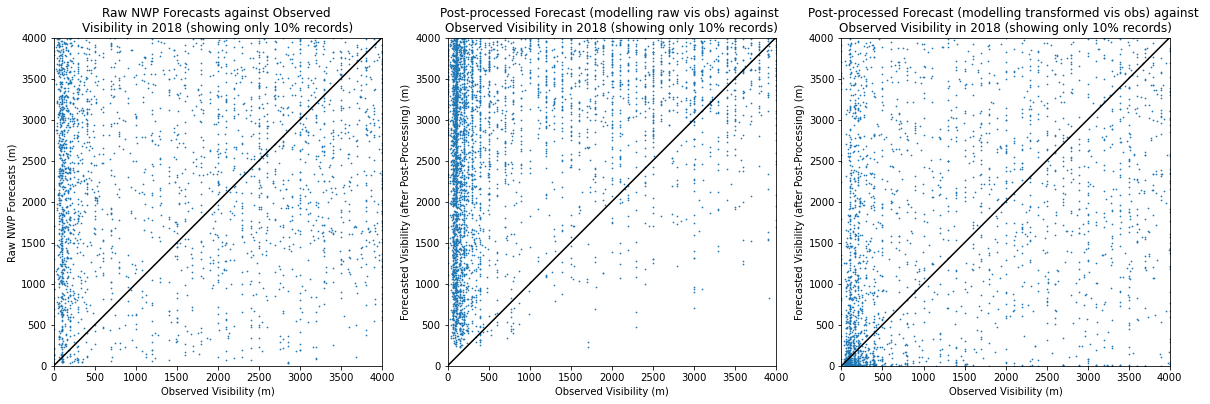

In [18]:
# Forecasts-against-observations plot (focus on 0 to 4000 m)
fig, axs = plt.subplots(1, 3, figsize=(20,13))
axs[0].scatter(vis_obs, vis_nwp, s=0.5)
axs[0].plot(np.arange(0,90000),np.arange(0,90000), '-', c='black')
axs[0].set_xlim(0,4000)
axs[0].set_ylim(0,4000)
axs[0].set(aspect='equal')
axs[0].set_xlabel("Observed Visibility (m)")
axs[0].set_ylabel("Raw NWP Forecasts (m)")
axs[0].set_title("Raw NWP Forecasts against Observed \nVisibility in 2018 (showing only 10% records)")
axs[1].scatter(vis_obs, vis_post_processed, s=0.5)
axs[1].plot(np.arange(0,90000),np.arange(0,90000), '-', c='black')
axs[1].set_xlim(0,4000)
axs[1].set_ylim(0,4000)
axs[1].set(aspect='equal')
axs[1].set_xlabel("Observed Visibility (m)")
axs[1].set_ylabel("Forecasted Visibility (after Post-Processing) (m)")
axs[1].set_title("Post-processed Forecast (modelling raw vis obs) against \nObserved Visibility in 2018 (showing only 10% records)")
axs[2].scatter(vis_obs_sample, vis_post_processed_sample_transformed, s=0.5)
axs[2].plot(np.arange(0,90000),np.arange(0,90000), '-', c='black')
axs[2].set_xlim(0,4000)
axs[2].set_ylim(0,4000)
axs[2].set(aspect='equal')
axs[2].set_xlabel("Observed Visibility (m)")
axs[2].set_ylabel("Forecasted Visibility (after Post-Processing) (m)")
axs[2].set_title("Post-processed Forecast (modelling transformed vis obs) against \nObserved Visibility in 2018 (showing only 10% records)")